This notebook contains all the 'peer' visualizations created using the Spotify Dataset obtained from Kaggle. In this notebook, I have aimed to do a comparitive analysis between the types of charts that spotify has (Top 200 and Viral 50).

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles
import operator
import collections
from collections import OrderedDict
from pylab import *

In [4]:
# the dataset link: https://www.kaggle.com/datasets/dhruvildave/spotify-charts?resource=download
# size: 991MB
# license: Database: Open Database, Contents: © Original Authors
# number of instance: 26173514
# number of columns: 9

# creating the main dataframe that I will be working off of
df = pd.read_csv('~/Downloads/charts.csv')
df

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0
...,...,...,...,...,...,...,...,...,...
26173509,BYE,46,2021-07-31,Jaden,https://open.spotify.com/track/3OUyyDN7EZrL7i0...,Vietnam,viral50,MOVE_UP,NaN
26173510,Pillars,47,2021-07-31,My Anh,https://open.spotify.com/track/6eky30oFiQbHUAT...,Vietnam,viral50,NEW_ENTRY,NaN
26173511,Gái Độc Thân,48,2021-07-31,Tlinh,https://open.spotify.com/track/2klsSb2iTfgDh95...,Vietnam,viral50,MOVE_DOWN,NaN
26173512,Renegade (feat. Taylor Swift),49,2021-07-31,Big Red Machine,https://open.spotify.com/track/1aU1wpYBSpP0M6I...,Vietnam,viral50,MOVE_DOWN,NaN


In [5]:
# Separating out features to look at, filtering to reduce the size of the dataset
features = ['title', 'artist', 'chart', 'date']
X = df[features]
X = X.query("date >= '2021-01-01'")
print(len(X))

5703536


In [6]:
# Divding dataframe into 2(top200 and viral50), deleting duplicate songs to have only unique values
top200 = X[X['chart'] == 'top200']
top200 = top200.drop_duplicates(subset=['title'])
print(len(top200))

viral50 = X[X['chart'] == 'viral50']
viral50 = viral50.drop_duplicates(subset=['title'])
print(len(viral50))

30770
20236


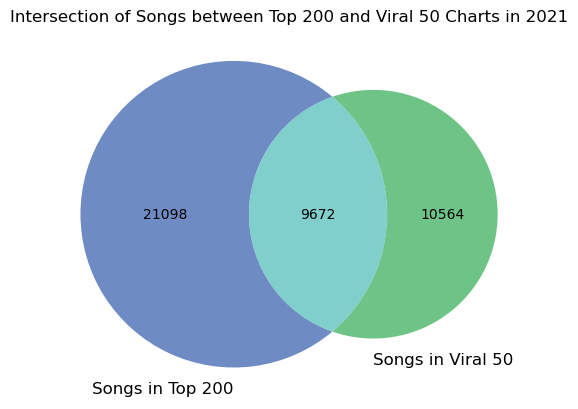

Text(0.02, 0.02, 'This is a venn diagram, comparing the two different charts to see if there is any overlap between them.')

<Figure size 640x480 with 0 Axes>

In [14]:
# Visualization 1

# Creating a venn diagram to show the intersection/overlap of the two types of charts. 
venn2([set(top200['title']), set(viral50['title'])], set_colors=('#3E64AF', '#3EAF5D'), 
      set_labels = ('Songs in Top 200', 'Songs in Viral 50'),
      alpha=0.75)
plt.title('Intersection of Songs between Top 200 and Viral 50 Charts in 2021')
plt.show()
figtext(.02, .02, "This is a venn diagram, comparing the two different charts to see if there is any overlap between them.")

In [8]:
# trying to find the 10 most appearing artists on the Top 200 chart
artists_top200 = top200['artist']

temp = {}
for i in artists_top200:
    if i in temp:
        temp[i] += 1
    else:
        temp[i] = 1
temp

counter_top200 = collections.Counter(temp)
top_10_top200 = counter_top200.most_common(10)
top_10_top200

person = []
num = []
for i in top_10_top200:
   person.append(i[0])
   num.append(i[1])

In [9]:
# trying to find the 10 most appearing artists on the Viral 50 chart
artists_viral50 = viral50['artist']

temp = {}
for i in artists_viral50:
    if i in temp:
        temp[i] += 1
    else:
        temp[i] = 1
temp

counter_viral50 = collections.Counter(temp)
top_10_viral50 = counter_viral50.most_common(10)
top_10_viral50

p = []
n = []
for i in top_10_viral50:
   p.append(i[0])
   n.append(i[1])

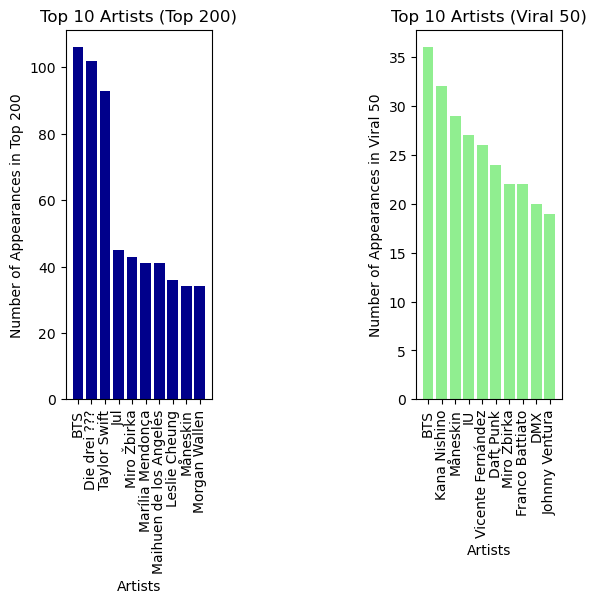

Text(0.02, 0.02, 'There are two bar plots side by side to show the direct comparison between the top 10 artists in the top 200 charts vs the top 10 artists in viral 50.')

<Figure size 640x480 with 0 Axes>

In [15]:
# Visualization 2

# plotting two bar graphs side by side to see the comparison of artists as well as how common each artist is
# on the two charts

# top 200 chart
plt.subplot(1,3,1)
plt.bar(person, num, color='darkblue')
plt.xlabel('Artists')
plt.ylabel('Number of Appearances in Top 200')
plt.title('Top 10 Artists (Top 200)')
plt.xticks(rotation = 90)

# viral 50 chart
plt.subplot(1,3,3)
plt.bar(p, n, color='lightgreen')
plt.xlabel('Artists')
plt.ylabel('Number of Appearances in Viral 50')
plt.title('Top 10 Artists (Viral 50)')
plt.xticks(rotation = 90)
plt.show()
figtext(.02, .02, "There are two bar plots side by side to show the direct comparison between the top 10 artists in the top 200 charts vs the top 10 artists in viral 50.")

In [21]:
UScharts = df.query("region == 'United States'")
UScharts = UScharts.query("date >= '2021-01-01'")
UScharts_top200 = UScharts.query("chart == 'top200'")
UScharts_viral50 = UScharts.query("chart == 'viral50'")

In [38]:
artists200 = list(UScharts_top200['artist'])

dict_200 = {}
for i in artists200:
    if i in dict_200:
        dict_200[i] +=1
    else:
        dict_200[i] = 1

counter_dict200 = collections.Counter(dict_200)
top_10_dict200 = counter_viral50.most_common(50)
top_10_dict200

people = []
num_count = []
for i in top_10_dict200:
   people.append(i[0])
   num_count.append(i[1])

print(people,num_count)

['BTS', 'Kana Nishino', 'Måneskin', 'IU', 'Vicente Fernández', 'Daft Punk', 'Miro Žbirka', 'Franco Battiato', 'DMX', 'Johnny Ventura', 'Children Of Bodom', 'Drake', 'Bo Burnham', 'AWS', 'Son Miserables', 'Raffaella Carrà', 'Taylor Swift', 'ElGrandeToto', 'Krzysztof Krawczyk', 'CNCO', 'Justin Bieber', 'YOASOBI', 'Coldplay', 'Tito Rojas', 'Leslie Cheung', 'Lembawe9', 'Billie Eilish', 'Inkonnu', 'Stray Kids', 'Olivia Rodrigo', 'RubberBand', 'Humbe', 'LFERDA', 'ENHYPEN', 'Ed Sheeran', 'V:RGO', 'Bad Bunny', 'Amr Diab', 'Serrini', 'Eladio Carrion', 'Pave Maijanen', 'Mauricio Penagos Villegas', 'No Party For Cao Dong', 'Fredi', 'Directivo Ultras XXI', 'Terence Lam', 'The Weeknd', 'Zack Tabudlo', 'Adele', 'Lege-Cy'] [36, 32, 29, 27, 26, 24, 22, 22, 20, 19, 18, 18, 17, 17, 17, 16, 15, 15, 15, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10]


In [40]:
dataset = pd.DataFrame({'Artist': people,'Number of Appearances': num_count})

# Show 3 first rows
dataset.head(3)

,Artist,Number of Appearances
0,BTS,36
1,Kana Nishino,32
2,Måneskin,29


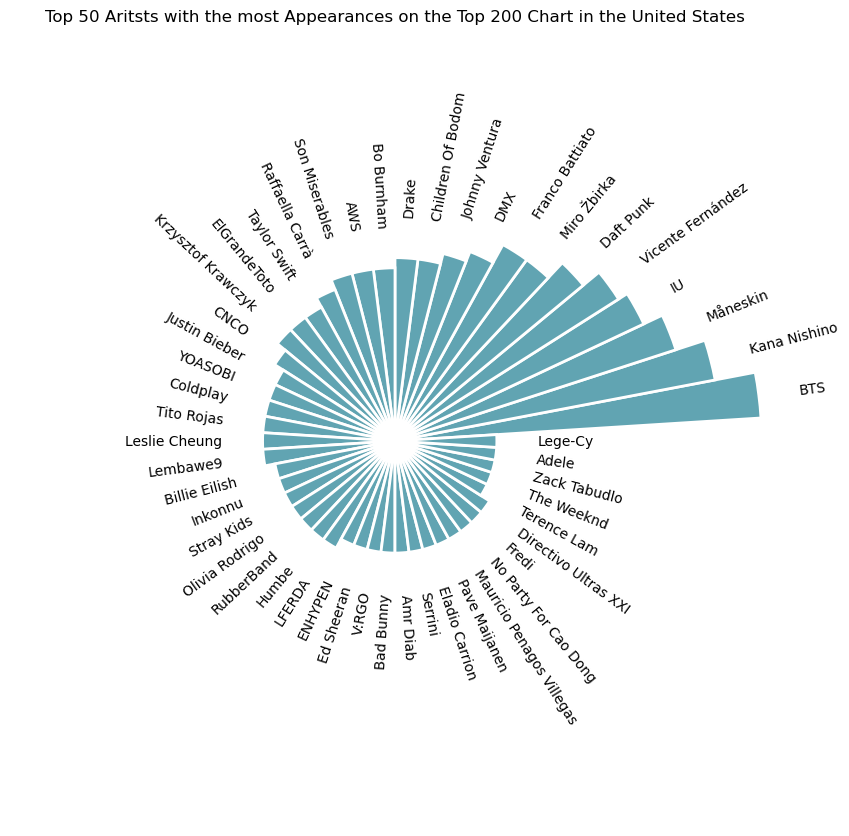

In [45]:
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')
plt.title('Top 50 Aritsts with the most Appearances on the Top 200 Chart in the United States')

upperLimit = 50
lowerLimit = 0
max = dataset['Number of Appearances'].max()
slope = (max - lowerLimit) / max
heights = slope * dataset['Number of Appearances'] + lowerLimit

width = 2*np.pi / len(dataset.index)

indexes = list(range(1, len(dataset.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

labelPadding = 4

for bar, angle, height, label in zip(bars, angles, heights, dataset["Artist"]):

    rotation = np.rad2deg(angle)

    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation,
        rotation_mode="anchor") 